Semiconductor Project

Authors:
- Aaron Carman
- Zachary Coon
- Clifton Dey

What does this shit do besides ruin underwear? We're not quite sure.
Clif I swear to God if you add more parentheses.

TODO:
1. A lot

Imports ,Graph Properties, and Fundamental Constants

Doesn't do anything very interesting. Refer to comments.

In [49]:
import matplotlib.pyplot as plt         # takes care of data visualization
import numpy as np                      # gives more math operations
import matplotlib                       # gives access to more advanced tools

rcParams = matplotlib.rcParams          # pull current graph parameters
rcParams['font.size'] = 10.0            # set default font to 10
rcParams['axes.titlesize'] = 20.0       # change title font to 20
rcParams['font.weight'] = 'normal'      # set default font to normal
rcParams['axes.titleweight'] = 'bold'   # set title font to bold

q = 1.602e-19       # elementary charge
eps0 = 8.85e-14     # permittivity of free space (eps0)
KTq = 0.02585       # thermal voltage at 300K

Material Properties

These are all the material properties that we need (and some that we don't currently need, but somehow I still hold out faith that there's a point to them). In the future, what we would like to do is have numerous materials stored somewhere that we can pull from. Maybe querying a database like NSM, or just manually entering in the properties in an Excel file or multiple files. Who knows.

In [50]:
Me = 0.18           # effective mass of electron (it's not used anywhere Clif wtf)
Mh = 1              # effective mass of hole (not used)
Nc = 1.2e18         # effective DOS of conductance band (not used)
Nv = 4.6e19         # effective DOS of valence band (not used)
Ni = 1e-10          # intrinsic carrier concentration
eps = 8.9*eps0      # material permittivity
Ec = 4.1E6          # critical E-field breakdown in V/cm

Na = np.logspace(15, 18, 4)   # acceptor doping that we want to sweep
Nd = np.logspace(15, 19, 5)   # donor doping that we want to sweep

Main Section of Code

This is Aaron's time to shine.

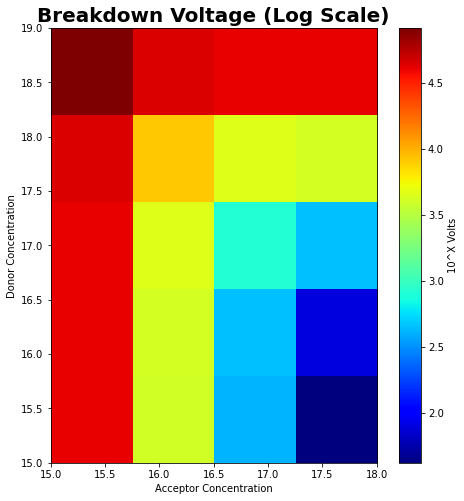

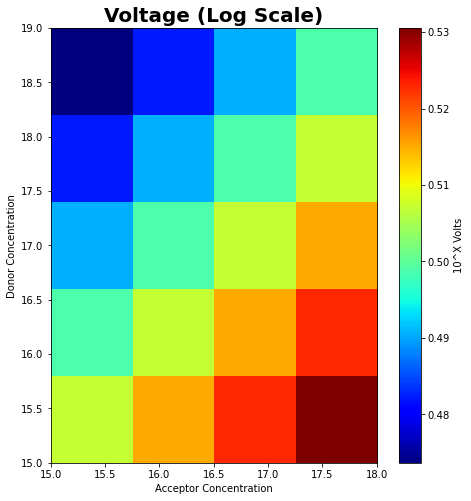

In [74]:
Ncols = len(Na)         # store the number of columns
Nrows = len(Nd)         # and the number of rows

Voltage = np.empty((Nrows, Ncols))
Depletion = np.empty((Nrows, Ncols))
BreakdownVoltage = np.empty((Nrows, Ncols))
ElectricField = np.empty((Nrows, Ncols))

for ii in range(0, Ncols):
    for rr in range(0, Nrows):
        ln = np.log((Na[ii]*Nd[rr])/(Ni**2))
        Voltage[rr, ii] = KTq*ln
        
        two_E = (2*eps)/q
        W0 = np.sqrt((two_E*Voltage[rr,ii]*((1/Na[ii]+1/Nd[rr]))))
        Depletion[rr, ii] = W0*1e-2

        qn = q*Nd[rr]/eps
        N = (Na[ii]/(Nd[rr]*(Nd[rr]+Na[ii])))
        
        ElectricField[rr,ii] = (qn*np.sqrt(two_E*N*Voltage[rr,ii]))
        
        V = (((Ec/qn)**2)/(two_E*N))
        BreakdownVoltage[rr,ii] = Voltage[rr,ii]-V

plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_title('Breakdown Voltage (Log Scale)')
plt.xlabel('Acceptor Concentration')
plt.ylabel('Donor Concentration')
im = ax.imshow(np.log10(abs(BreakdownVoltage)), extent=[min(np.log10(Na)), max(np.log10(Na)), min(np.log10(Nd)), max(np.log10(Nd))], cmap='jet')
cbar = plt.colorbar(im)
cbar.set_label('10^X Volts')

plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_title('Voltage (Log Scale)')
plt.xlabel('Acceptor Concentration')
plt.ylabel('Donor Concentration')
im = ax.imshow(np.log10(abs(Voltage)), extent=[min(np.log10(Na)), max(np.log10(Na)), min(np.log10(Nd)), max(np.log10(Nd))], cmap='jet')
cbar = plt.colorbar(im)
cbar.set_label('10^X Volts')
plt.show()